In [4]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau

Machine Amrta

In [5]:
filename = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Train_Foot.csv"
filename_test= 'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Test_Foot.csv'

Machine Dylane

In [6]:
# filename = 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Train_Foot.csv'
# filename_test= 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Test_Foot.csv'

In [7]:
# Chargement des données csv
data= pd.read_csv(filename,sep=";",index_col=0)
data.head()

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2409,6154
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4008,3054
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3029,4815
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2803,2045
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2156,1065


# Construction du Y 

In [8]:
def nb_buts(x,data):
    tab =data.values
    for i in tab:
        if i[10]>x:
            i[24] = 1
        else:
             i[24] = 0
    a = tab[:,24]
    return a.astype(int)

## MODELE 1 :Y pour buts >0,5

In [9]:
a=nb_buts(0.5,data)
data_x = data.copy()
data_x['buts_class'] = a.astype("int64")
data_x

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam,buts_class
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409,6154,1
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4008,3054,1
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3029,4815,1
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2803,2045,1
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,0,1.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156,1065,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2019-05-18,Levante,Ath Madrid,0.0,0,2.0,2.0,2.0,0.0,2.0,...,1.678414,0.437086,0.678414,1.140969,0.660793,0.471366,0.229075,5198,10169,1
376,2019-05-18,Sevilla,Ath Bilbao,1.0,0,2.0,0.0,1.0,0.0,1.0,...,1.268722,0.651982,0.590308,1.312775,1.162996,0.603524,0.519824,9335,6881,1
377,2019-05-18,Valladolid,Valencia,2.0,0,0.0,2.0,0.0,1.0,1.0,...,1.506608,0.297297,0.722467,0.215859,1.246696,0.088106,0.533040,4109,12990,1
378,2019-05-19,Eibar,Barcelona,0.0,1,2.0,2.0,2.0,2.0,4.0,...,2.823789,0.572687,1.074890,1.392070,0.823789,0.629956,0.361233,4455,15917,1


In [10]:
x=data_x[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1437,2020-07-05,FINISHED,279524,Cagliari Calcio,Atalanta BC,104,102,2866,7928,1.655172,2.648649,1.216216,1.486486
1438,2020-07-05,FINISHED,279525,Brescia Calcio,Hellas Verona FC,449,450,1140,2280,0.862069,1.275862,2.000000,1.172414
1439,2020-07-05,FINISHED,279518,SSC Napoli,AS Roma,113,100,7165,6735,1.611111,1.827586,1.517241,1.379310
708,2020-07-05,FINISHED,264670,Southampton FC,Manchester City FC,340,65,2956,10390,1.281250,2.538462,1.410256,0.974359
707,2020-07-05,FINISHED,264662,Liverpool FC,Aston Villa FC,64,58,14695,1553,2.125000,1.125000,1.156250,1.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,1.973684,1.548387,1.161290,0.967742
2027,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.781250,0.833333,1.433333,1.666667
2028,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,1.000000,1.562500,1.156250,1.125000
2029,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.843750,0.750000,1.343750,1.937500


In [11]:
y = data_x.buts_class
np.unique(y)

array([0, 1], dtype=int64)

In [12]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)
y_train

(9272, 6) (9272,)
2


array([1, 1, 1, ..., 1, 1, 1])

In [13]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(nbClasses, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [14]:
model_zero_cinq = create_model()
print(model_zero_cinq.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               3584      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1

In [15]:
save_zero_cinq = ModelCheckpoint('model_buts_0,5.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [16]:
history = model_zero_cinq.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=50,
                    callbacks = [save_zero_cinq])

Train on 9272 samples, validate on 2319 samples
Epoch 1/50
9000/9272 [============================>.] - ETA: 0s - loss: 8.7069 - accuracy: 0.8732 - ETA: 2s - loss: 10.7904 - accura
Epoch 00001: val_accuracy improved from -inf to 0.92324, saving model to model_buts_0,5.h5
9272/9272 [==============================] - 9s 976us/sample - loss: 8.5087 - accuracy: 0.8747 - val_loss: 0.9825 - val_accuracy: 0.9232
Epoch 2/50
9180/9272 [============================>.] - ETA: 0s - loss: 0.4314 - accuracy: 0.9175
Epoch 00002: val_accuracy did not improve from 0.92324
9272/9272 [==============================] - 2s 226us/sample - loss: 0.4302 - accuracy: 0.9175 - val_loss: 0.3042 - val_accuracy: 0.9232
Epoch 3/50
9270/9272 [============================>.] - ETA: 0s - loss: 0.2841 - accuracy: 0.9260 ETA: 0s - loss: 0.2854 - accuracy: 0.
Epoch 00003: val_accuracy did not improve from 0.92324
9272/9272 [==============================] - 2s 222us/sample - loss: 0.2843 - accuracy: 0.9259 - val_loss: 0.3

Epoch 29/50
9090/9272 [============================>.] - ETA: 0s - loss: 0.2813 - accuracy: 0.9248
Epoch 00029: val_accuracy did not improve from 0.92324
9272/9272 [==============================] - 2s 260us/sample - loss: 0.2798 - accuracy: 0.9252 - val_loss: 0.2938 - val_accuracy: 0.9232
Epoch 30/50
9270/9272 [============================>.] - ETA: 0s - loss: 0.2670 - accuracy: 0.9259
Epoch 00030: val_accuracy did not improve from 0.92324
9272/9272 [==============================] - 2s 239us/sample - loss: 0.2670 - accuracy: 0.9259 - val_loss: 0.2724 - val_accuracy: 0.9232
Epoch 31/50
9090/9272 [============================>.] - ETA: 0s - loss: 0.2675 - accuracy: 0.9255 ETA: 0s - loss: 0.2714 - accuracy
Epoch 00031: val_accuracy did not improve from 0.92324
9272/9272 [==============================] - 2s 248us/sample - loss: 0.2665 - accuracy: 0.9259 - val_loss: 0.2737 - val_accuracy: 0.9232
Epoch 32/50
9180/9272 [============================>.] - ETA: 0s - loss: 0.2633 - accuracy: 0

Text(0, 0.5, 'Accuracy')

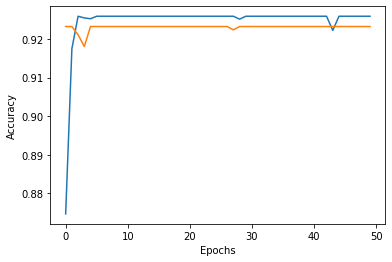

In [17]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prediction y > 0.5

In [66]:
unique = x_prediction.values
results = []
superieurzero =[]
inferieurzero = []
i = 0
predictions_final = model_zero_cinq.predict(np.array([x_train[1]]))
predictions_final

array([[0.331266 , 0.6687341]], dtype=float32)

In [67]:
model_zero_cinq.load_weights("model_buts_0,5.h5")

In [68]:
for i in unique:
    predictions_final = model_zero_cinq.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    results.append(result)
    pred0 =round(predictions_final[0][0]*100,2)
    pred1 =round(predictions_final[0][1]*100,2)
    inferieurzero.append(pred0)
    superieurzero.append(pred1)


In [69]:
superieurzero = np.round(superieurzero,2)
inferieurzero = np.round(inferieurzero,2)

In [70]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'probabilité_inf_0,5_buts':inferieurzero,'probabilité_sup_0,5_buts':superieurzero}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"probabilité_inf_0,5_buts","probabilité_sup_0,5_buts"
1437,2020-07-05,279524,FINISHED,104,102,Cagliari Calcio,Atalanta BC,0.00,100.00
1438,2020-07-05,279525,FINISHED,449,450,Brescia Calcio,Hellas Verona FC,0.13,99.87
1439,2020-07-05,279518,FINISHED,113,100,SSC Napoli,AS Roma,0.00,100.00
708,2020-07-05,264670,FINISHED,340,65,Southampton FC,Manchester City FC,0.00,100.00
707,2020-07-05,264662,FINISHED,64,58,Liverpool FC,Aston Villa FC,0.00,100.00
...,...,...,...,...,...,...,...,...,...
2026,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,0.00,100.00
2027,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,0.11,99.89
2028,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,0.01,99.99
2029,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,4.09,95.91


In [71]:
df.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_modele_0,5.csv',index = False)
df.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_modele_0,5.json')

## MODELE 2 :Y pour buts > 1,5

In [23]:
a=nb_buts(1.5,data)
data_x = data.copy()
data_x['buts_class'] = a.astype("int64")
data_x

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam,buts_class
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409,6154,1
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4008,3054,1
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3029,4815,0
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2803,2045,1
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,0,1.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156,1065,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2019-05-18,Levante,Ath Madrid,0.0,0,2.0,2.0,2.0,0.0,2.0,...,1.678414,0.437086,0.678414,1.140969,0.660793,0.471366,0.229075,5198,10169,1
376,2019-05-18,Sevilla,Ath Bilbao,1.0,0,2.0,0.0,1.0,0.0,1.0,...,1.268722,0.651982,0.590308,1.312775,1.162996,0.603524,0.519824,9335,6881,1
377,2019-05-18,Valladolid,Valencia,2.0,0,0.0,2.0,0.0,1.0,1.0,...,1.506608,0.297297,0.722467,0.215859,1.246696,0.088106,0.533040,4109,12990,1
378,2019-05-19,Eibar,Barcelona,0.0,1,2.0,2.0,2.0,2.0,4.0,...,2.823789,0.572687,1.074890,1.392070,0.823789,0.629956,0.361233,4455,15917,1


In [24]:
y = data_x.buts_class
np.unique(y)

array([0, 1], dtype=int64)

In [25]:
x=data_x[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1437,2020-07-05,FINISHED,279524,Cagliari Calcio,Atalanta BC,104,102,2866,7928,1.655172,2.648649,1.216216,1.486486
1438,2020-07-05,FINISHED,279525,Brescia Calcio,Hellas Verona FC,449,450,1140,2280,0.862069,1.275862,2.000000,1.172414
1439,2020-07-05,FINISHED,279518,SSC Napoli,AS Roma,113,100,7165,6735,1.611111,1.827586,1.517241,1.379310
708,2020-07-05,FINISHED,264670,Southampton FC,Manchester City FC,340,65,2956,10390,1.281250,2.538462,1.410256,0.974359
707,2020-07-05,FINISHED,264662,Liverpool FC,Aston Villa FC,64,58,14695,1553,2.125000,1.125000,1.156250,1.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,1.973684,1.548387,1.161290,0.967742
2027,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.781250,0.833333,1.433333,1.666667
2028,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,1.000000,1.562500,1.156250,1.125000
2029,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.843750,0.750000,1.343750,1.937500


In [26]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)
y_train

(9272, 6) (9272,)
2


array([1, 1, 1, ..., 1, 0, 1])

In [27]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(nbClasses, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [28]:
model_un_cinq = create_model()
print(model_un_cinq.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               3584      
_________________________________________________________________
dense_17 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_18 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_19 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_20 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_21 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_22 (Dense)             (None, 128)              

In [29]:
save_un_cinq = ModelCheckpoint('model_buts_1,5.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [30]:
history = model_un_cinq.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=50,
                    callbacks = [save_un_cinq])

Train on 9272 samples, validate on 2319 samples
Epoch 1/50
9270/9272 [============================>.] - ETA: 0s - loss: 7.7689 - accuracy: 0.6512
Epoch 00001: val_accuracy improved from -inf to 0.75334, saving model to model_buts_1,5.h5
9272/9272 [==============================] - 7s 758us/sample - loss: 7.7674 - accuracy: 0.6513 - val_loss: 0.5851 - val_accuracy: 0.7533
Epoch 2/50
9180/9272 [============================>.] - ETA: 0s - loss: 0.6078 - accuracy: 0.7285
Epoch 00002: val_accuracy did not improve from 0.75334
9272/9272 [==============================] - 2s 236us/sample - loss: 0.6071 - accuracy: 0.7290 - val_loss: 0.5828 - val_accuracy: 0.7533
Epoch 3/50
9270/9272 [============================>.] - ETA: 0s - loss: 0.5898 - accuracy: 0.7345
Epoch 00003: val_accuracy did not improve from 0.75334
9272/9272 [==============================] - 2s 248us/sample - loss: 0.5897 - accuracy: 0.7346 - val_loss: 0.5960 - val_accuracy: 0.7158
Epoch 4/50
9180/9272 [========================

Epoch 29/50
9180/9272 [============================>.] - ETA: 0s - loss: 0.5712 - accuracy: 0.7400
Epoch 00029: val_accuracy did not improve from 0.75334
9272/9272 [==============================] - 2s 249us/sample - loss: 0.5711 - accuracy: 0.7402 - val_loss: 0.5568 - val_accuracy: 0.7529
Epoch 30/50
9270/9272 [============================>.] - ETA: 0s - loss: 0.5682 - accuracy: 0.7402
Epoch 00030: val_accuracy did not improve from 0.75334
9272/9272 [==============================] - 2s 255us/sample - loss: 0.5682 - accuracy: 0.7402 - val_loss: 0.5720 - val_accuracy: 0.7525
Epoch 31/50
9090/9272 [============================>.] - ETA: 0s - loss: 0.5704 - accuracy: 0.7400
Epoch 00031: val_accuracy did not improve from 0.75334
9272/9272 [==============================] - 2s 247us/sample - loss: 0.5702 - accuracy: 0.7401 - val_loss: 0.5535 - val_accuracy: 0.7533
Epoch 32/50
9090/9272 [============================>.] - ETA: 0s - loss: 0.5710 - accuracy: 0.7402
Epoch 00032: val_accuracy di

Text(0, 0.5, 'Accuracy')

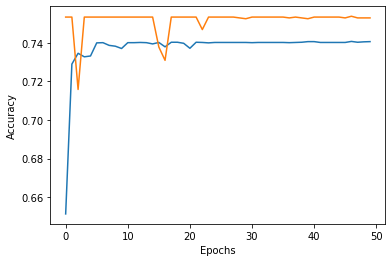

In [31]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prediction y > 1.5

In [32]:
unique = x_prediction.values
results = []
superieurun =[]
inferieurun = []
i = 0
predictions_final = model_un_cinq.predict(np.array([x_train[1]]))
predictions_final

array([[0.18114583, 0.81885415]], dtype=float32)

In [33]:
model_un_cinq.load_weights("model_buts_1,5.h5")

In [34]:
for i in unique:
    predictions_final = model_un_cinq.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    results.append(result)
    pred0 =round(predictions_final[0][0]*100,2)
    pred1 =round(predictions_final[0][1]*100,2)
    inferieurun.append(pred0)
    superieurun.append(pred1)

In [35]:
superieurun = np.round(superieurun,2)
inferieurun = np.round(inferieurun,2)

In [36]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'probabilité_inf_1,5 buts':inferieurun,'probabilité_sup_1,5 buts':superieurun}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"probabilité_inf_1,5 buts","probabilité_sup_1,5 buts"
1437,2020-07-05,279524,FINISHED,104,102,Cagliari Calcio,Atalanta BC,22.15,77.85
1438,2020-07-05,279525,FINISHED,449,450,Brescia Calcio,Hellas Verona FC,29.44,70.56
1439,2020-07-05,279518,FINISHED,113,100,SSC Napoli,AS Roma,25.94,74.06
708,2020-07-05,264670,FINISHED,340,65,Southampton FC,Manchester City FC,18.47,81.53
707,2020-07-05,264662,FINISHED,64,58,Liverpool FC,Aston Villa FC,15.33,84.67
...,...,...,...,...,...,...,...,...,...
2026,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,26.17,73.83
2027,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,28.05,71.95
2028,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,29.16,70.84
2029,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,30.93,69.07


In [37]:
df.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_modele_1,5.csv',index = False)
df.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_modele_1,5.json')

## MODELE 3 :Y pour buts > 2,5

In [38]:
a=nb_buts(2.5,data)
data_x = data.copy()
data_x['buts_class'] = a.astype("int64")
data_x

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam,buts_class
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409,6154,1
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4008,3054,0
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3029,4815,0
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2803,2045,1
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,0,1.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156,1065,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2019-05-18,Levante,Ath Madrid,0.0,0,2.0,2.0,2.0,0.0,2.0,...,1.678414,0.437086,0.678414,1.140969,0.660793,0.471366,0.229075,5198,10169,1
376,2019-05-18,Sevilla,Ath Bilbao,1.0,0,2.0,0.0,1.0,0.0,1.0,...,1.268722,0.651982,0.590308,1.312775,1.162996,0.603524,0.519824,9335,6881,0
377,2019-05-18,Valladolid,Valencia,2.0,0,0.0,2.0,0.0,1.0,1.0,...,1.506608,0.297297,0.722467,0.215859,1.246696,0.088106,0.533040,4109,12990,0
378,2019-05-19,Eibar,Barcelona,0.0,1,2.0,2.0,2.0,2.0,4.0,...,2.823789,0.572687,1.074890,1.392070,0.823789,0.629956,0.361233,4455,15917,1


In [39]:
x=data_x[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1437,2020-07-05,FINISHED,279524,Cagliari Calcio,Atalanta BC,104,102,2866,7928,1.655172,2.648649,1.216216,1.486486
1438,2020-07-05,FINISHED,279525,Brescia Calcio,Hellas Verona FC,449,450,1140,2280,0.862069,1.275862,2.000000,1.172414
1439,2020-07-05,FINISHED,279518,SSC Napoli,AS Roma,113,100,7165,6735,1.611111,1.827586,1.517241,1.379310
708,2020-07-05,FINISHED,264670,Southampton FC,Manchester City FC,340,65,2956,10390,1.281250,2.538462,1.410256,0.974359
707,2020-07-05,FINISHED,264662,Liverpool FC,Aston Villa FC,64,58,14695,1553,2.125000,1.125000,1.156250,1.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,1.973684,1.548387,1.161290,0.967742
2027,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.781250,0.833333,1.433333,1.666667
2028,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,1.000000,1.562500,1.156250,1.125000
2029,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.843750,0.750000,1.343750,1.937500


In [40]:
y = data_x.buts_class
np.unique(y)

array([0, 1], dtype=int64)

In [41]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)
y_train

(9272, 6) (9272,)
2


array([0, 1, 1, ..., 1, 0, 1])

In [42]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(nbClasses, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [44]:
model_deux_cinq= create_model()
print(model_deux_cinq.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 512)               3584      
_________________________________________________________________
dense_33 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_34 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_35 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_36 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_37 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_38 (Dense)             (None, 128)              

In [45]:
save_deux_cinq = ModelCheckpoint('model_buts_2,5.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [46]:
history = model_deux_cinq.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=50,
                    callbacks = [save_deux_cinq])

Train on 9272 samples, validate on 2319 samples
Epoch 1/50
9090/9272 [============================>.] - ETA: 0s - loss: 9.8440 - accuracy: 0.5164 
Epoch 00001: val_accuracy improved from -inf to 0.50841, saving model to model_buts_2,5.h5
9272/9272 [==============================] - 2s 225us/sample - loss: 9.6684 - accuracy: 0.5154 - val_loss: 0.7967 - val_accuracy: 0.5084
Epoch 2/50
9180/9272 [============================>.] - ETA: 0s - loss: 0.7510 - accuracy: 0.5245
Epoch 00002: val_accuracy did not improve from 0.50841
9272/9272 [==============================] - 1s 137us/sample - loss: 0.7509 - accuracy: 0.5239 - val_loss: 0.8003 - val_accuracy: 0.4946
Epoch 3/50
9270/9272 [============================>.] - ETA: 0s - loss: 0.7385 - accuracy: 0.5365
Epoch 00003: val_accuracy improved from 0.50841 to 0.51143, saving model to model_buts_2,5.h5
9272/9272 [==============================] - 1s 140us/sample - loss: 0.7385 - accuracy: 0.5363 - val_loss: 0.7221 - val_accuracy: 0.5114
Epoch 

Epoch 29/50
9090/9272 [============================>.] - ETA: 0s - loss: 0.6885 - accuracy: 0.5470
Epoch 00029: val_accuracy did not improve from 0.54851
9272/9272 [==============================] - 1s 106us/sample - loss: 0.6885 - accuracy: 0.5462 - val_loss: 0.6899 - val_accuracy: 0.5334
Epoch 30/50
8820/9272 [===========================>..] - ETA: 0s - loss: 0.6884 - accuracy: 0.5466 ETA: 0s - loss: 0
Epoch 00030: val_accuracy did not improve from 0.54851
9272/9272 [==============================] - 1s 105us/sample - loss: 0.6887 - accuracy: 0.5452 - val_loss: 0.6966 - val_accuracy: 0.5416
Epoch 31/50
9180/9272 [============================>.] - ETA: 0s - loss: 0.6884 - accuracy: 0.5422
Epoch 00031: val_accuracy did not improve from 0.54851
9272/9272 [==============================] - 1s 125us/sample - loss: 0.6884 - accuracy: 0.5422 - val_loss: 0.7063 - val_accuracy: 0.5300
Epoch 32/50
9270/9272 [============================>.] - ETA: 0s - loss: 0.6895 - accuracy: 0.5490
Epoch 0003

Text(0, 0.5, 'Accuracy')

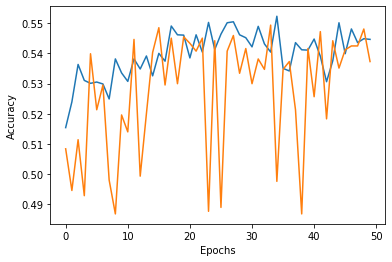

In [47]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prédiction

In [74]:
unique = x_prediction.values
results = []
superieur2 =[]
inferieur2 = []
i = 0
predictions_final = model_deux_cinq.predict(np.array([x_train[1]]))
predictions_final.shape

(1, 2)

In [75]:
model_deux_cinq.load_weights("model_buts_2,5.h5")

In [76]:
for i in unique:
    predictions_final = model_deux_cinq.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    results.append(result)
    pred0 =round(predictions_final[0][0]*100,2)
    pred1 =round(predictions_final[0][1]*100,2)
    inferieur2.append(pred0)
    superieur2.append(pred1)

In [77]:
superieur2 = np.round(superieur2,2)
inferieur2 = np.round(inferieur2,2)
superieurun = np.round(superieurun,2)
inferieurun = np.round(inferieurun,2)

In [78]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'probabilité_inf_2,5 buts':inferieur2,'probabilité_sup_2,5 buts':superieur2}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"probabilité_inf_2,5 buts","probabilité_sup_2,5 buts"
1437,2020-07-05,279524,FINISHED,104,102,Cagliari Calcio,Atalanta BC,46.29,53.71
1438,2020-07-05,279525,FINISHED,449,450,Brescia Calcio,Hellas Verona FC,54.41,45.59
1439,2020-07-05,279518,FINISHED,113,100,SSC Napoli,AS Roma,47.96,52.04
708,2020-07-05,264670,FINISHED,340,65,Southampton FC,Manchester City FC,43.25,56.75
707,2020-07-05,264662,FINISHED,64,58,Liverpool FC,Aston Villa FC,33.01,66.99
...,...,...,...,...,...,...,...,...,...
2026,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,49.05,50.95
2027,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,52.23,47.77
2028,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,52.86,47.14
2029,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,55.85,44.15


In [79]:
df.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_modele_2,5.csv',index = False)
df.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_modele_2,5.json')

In [80]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'inferieur_a_0,5_buts':inferieurzero,'supérieur_a_0,5_buts':superieurzero,'inferieur_a_1,5_buts':inferieurun,'supérieur_a_1,5_buts':superieurun,'inferieur_a_2,5_buts':inferieur2,'superieur_a_2,5_buts':superieur2}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"inferieur_a_0,5_buts","supérieur_a_0,5_buts","inferieur_a_1,5_buts","supérieur_a_1,5_buts","inferieur_a_2,5_buts","superieur_a_2,5_buts"
1437,2020-07-05,279524,FINISHED,104,102,Cagliari Calcio,Atalanta BC,0.00,100.00,22.15,77.85,46.29,53.71
1438,2020-07-05,279525,FINISHED,449,450,Brescia Calcio,Hellas Verona FC,0.13,99.87,29.44,70.56,54.41,45.59
1439,2020-07-05,279518,FINISHED,113,100,SSC Napoli,AS Roma,0.00,100.00,25.94,74.06,47.96,52.04
708,2020-07-05,264670,FINISHED,340,65,Southampton FC,Manchester City FC,0.00,100.00,18.47,81.53,43.25,56.75
707,2020-07-05,264662,FINISHED,64,58,Liverpool FC,Aston Villa FC,0.00,100.00,15.33,84.67,33.01,66.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,0.00,100.00,26.17,73.83,49.05,50.95
2027,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,0.11,99.89,28.05,71.95,52.23,47.77
2028,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,0.01,99.99,29.16,70.84,52.86,47.14
2029,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,4.09,95.91,30.93,69.07,55.85,44.15


In [90]:
finished = []
scheduled = []

In [91]:
for i in df.values:
    if i[2] == 'FINISHED':
        finished.append(i)
    else:
        scheduled.append(i)

In [92]:
column_names = ["date","id_match", "status","id_HomeTeam","id_AwayTeam","homeTeam","AwayTeam","inferieur_a_0,5_buts","supérieur_a_0,5_buts","inferieur_a_1,5_buts","superieur_a_1,5_buts","inferieur_a_2,5_buts","superieur_a_2,5_buts"]
df_fini = pd.DataFrame(finished,columns = column_names)
df_programme = pd.DataFrame(scheduled,columns = column_names)
df_fini = df_fini.sort_values(by = 'date',ascending= False)
df_programme= df_programme.sort_values(by = 'date',ascending= True)

In [93]:
df_fini

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"inferieur_a_0,5_buts","supérieur_a_0,5_buts","inferieur_a_1,5_buts","superieur_a_1,5_buts","inferieur_a_2,5_buts","superieur_a_2,5_buts"
88,2020-07-14,274460,FINISHED,1903,5543,Sport Lisboa e Benfica,Vitória SC,0.00,100.00,25.53,74.47,49.68,50.32
87,2020-07-14,274463,FINISHED,5601,810,Portimonense SC,Boavista FC,0.10,99.90,29.27,70.73,54.21,45.79
86,2020-07-14,274462,FINISHED,5530,5544,CD Santa Clara,CD Aves,0.44,99.56,28.34,71.66,52.45,47.55
85,2020-07-14,279550,FINISHED,102,449,Atalanta BC,Brescia Calcio,0.01,99.99,22.05,77.95,43.71,56.29
84,2020-07-14,274458,FINISHED,5533,1049,Gil Vicente FC,CD Tondela,1.03,98.97,30.54,69.46,55.27,44.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2020-07-05,279525,FINISHED,449,450,Brescia Calcio,Hellas Verona FC,0.13,99.87,29.44,70.56,54.41,45.59
6,2020-07-05,264669,FINISHED,328,356,Burnley FC,Sheffield United FC,0.01,99.99,28.66,71.34,52.23,47.77
7,2020-07-05,279522,FINISHED,115,107,Udinese Calcio,Genoa CFC,0.13,99.87,28.75,71.25,53.76,46.24
8,2020-07-05,279523,FINISHED,584,1107,UC Sampdoria,SPAL 2013,0.22,99.78,29.61,70.39,53.98,46.02


In [94]:
df_programme

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"inferieur_a_0,5_buts","supérieur_a_0,5_buts","inferieur_a_1,5_buts","superieur_a_1,5_buts","inferieur_a_2,5_buts","superieur_a_2,5_buts"
0,2020-07-15,264691,SCHEDULED,65,1044,Manchester City FC,AFC Bournemouth,0.00,100.00,20.92,79.08,40.40,59.60
114,2020-07-15,274459,SCHEDULED,583,507,Moreirense FC,FC Paços de Ferreira,1.58,98.42,30.04,69.96,55.09,44.91
115,2020-07-15,274456,SCHEDULED,5613,5568,Sporting Clube de Braga,Os Belenenses Futebol,0.04,99.96,25.97,74.03,48.85,51.15
116,2020-07-15,274455,SCHEDULED,503,498,FC Porto,Sporting Clube de Portugal,0.00,100.00,26.57,73.43,49.42,50.58
50,2020-07-15,279548,SCHEDULED,98,112,AC Milan,Parma Calcio 1913,0.01,99.99,27.63,72.37,52.01,47.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2020-08-07,285535,SCHEDULED,65,86,Manchester City FC,Real Madrid CF,0.00,100.00,23.33,76.67,44.24,55.76
111,2020-08-08,285547,SCHEDULED,81,113,FC Barcelona,SSC Napoli,0.00,100.00,20.26,79.74,42.40,57.60
110,2020-08-08,285541,SCHEDULED,5,61,FC Bayern München,Chelsea FC,0.00,100.00,22.82,77.18,43.82,56.18
112,2020-08-12,296641,SCHEDULED,102,524,Atalanta BC,Paris Saint-Germain FC,0.00,100.00,25.18,74.82,45.78,54.22


In [95]:
df_fini.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_finished.csv',index=False)
df_fini.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_finished.json')

In [96]:
df_programme.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_scheduled.csv',index=False)
df_programme.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_scheduled.json')